**IMPORTING THE REQUIRED LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**LOADING THE DATASET**

In [ ]:
!pip install chardet
import chardet

with open('/content/NetflixOriginals.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

encoding = result['encoding']

df = pd.read_csv('/content/NetflixOriginals.csv', encoding=encoding)


**HANDLING THE MISSING VALUES USING SIMPLE IMPUTER IN SKLEARN**

In [ ]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [ ]:

# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df = df.fillna(df.mean())  # Fill missing values with mean values

<ipython-input-16-5be8887a7716>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())  # Fill missing values with mean values


**SPLITING THE DATA INTO TRAIN SET AND TEST SET**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named 'df' and contains your data
# Specify the features (X) and the target (y)
X = df.drop('IMDB Score', axis=1)  # Replace 'target_column_name' with the actual name of your target column
y = df['IMDB Score']  # Replace 'target_column_name' with the actual name of your target column

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# The 'test_size' parameter specifies the proportion of the data to be included in the test set (in this case, 20%).
# 'random_state' is set for reproducibility. You can change the value of 'random_state' to any integer.


**FEATURE SCALING USING MINMAXSCALER**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Identify the non-numeric columns and exclude them from scaling
numeric_columns = X.select_dtypes(include=[float, int]).columns
X_numeric = X[numeric_columns]

# Fit the scaler on the training data and transform the numeric data
X_train_scaled = scaler.fit_transform(X_numeric)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test[numeric_columns])


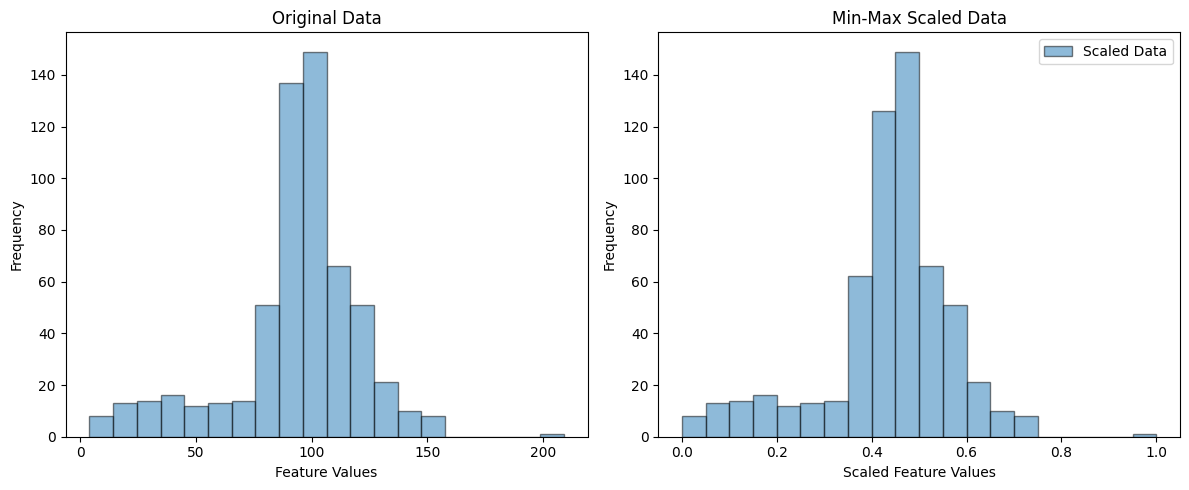

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of the original and scaled data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot original data
axes[0].hist(X_numeric.values, bins=20, edgecolor='k', alpha=0.5, label='Original Data')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature Values')
axes[0].set_ylabel('Frequency')

# Plot scaled data
axes[1].hist(X_train_scaled, bins=20, edgecolor='k', alpha=0.5, label='Scaled Data')
axes[1].set_title('Min-Max Scaled Data')
axes[1].set_xlabel('Scaled Feature Values')
axes[1].set_ylabel('Frequency')

plt.legend()
plt.tight_layout()
plt.show()


**FEATURE ENGINEERING**

In [ ]:

# Define the window size for the rolling mean
window_size = 5  # Adjust this based on your dataset and needs

# Calculate the rolling mean for the 'IMDB Score' column
df['IMDB_Score_Rolling_Mean'] = df['IMDB Score'].rolling(window=window_size).mean()

# Drop rows with NaN values that result from the rolling mean calculation
df.dropna(inplace=True)


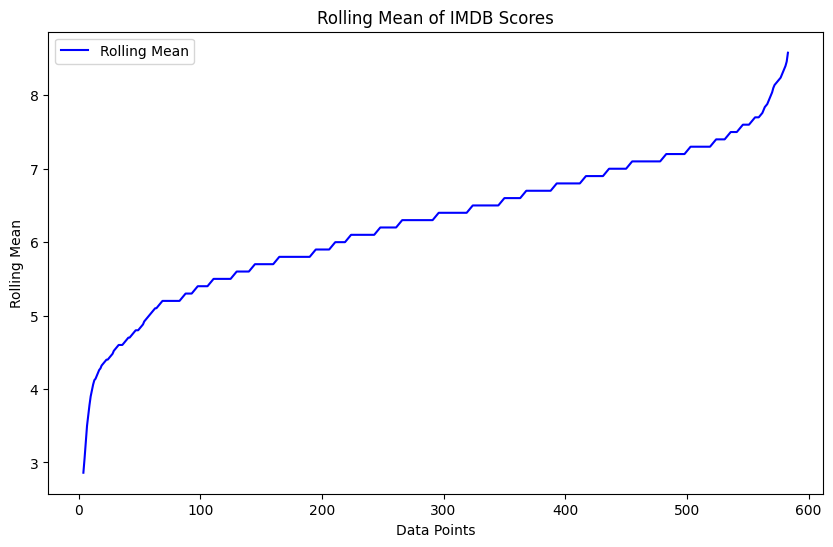

In [ ]:

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the rolling mean
ax.plot(df['IMDB_Score_Rolling_Mean'], label='Rolling Mean', color='blue')

# Add labels and a legend
ax.set_xlabel('Data Points')
ax.set_ylabel('Rolling Mean')
ax.set_title('Rolling Mean of IMDB Scores')
ax.legend()

# Show the plot
plt.show()


In [ ]:
# Assuming 'df' is your DataFrame and 'column_name' is the name of the column to convert
df['Premiere'] = pd.to_numeric(df['Premiere'], errors='coerce', downcast='float')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Specify the target variable and the input features
X = df.drop(columns=['IMDB Score'])
y = df['IMDB Score']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Optionally, evaluate the model using R-squared (R2) for regression tasks
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2): {r2}")


Mean Squared Error: 0.9137049403592807
R-squared (R2): 0.020018898537501495


In [ ]:
# Make predictions on the test data
predictions = model.predict(X_test)

# Define the threshold for classification
threshold = 1.8 # Adjust this threshold based on your problem

# Calculate whether predictions are within the threshold
correct_predictions = abs(y_test - predictions) <= threshold

# Calculate accuracy
accuracy = correct_predictions.sum() / len(correct_predictions)
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 91.23%
